In [1]:
# pip install imbalanced-learn

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
# import missingno as msno
# from sklearn.linear_model import SGDClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

import time
import warnings
warnings.filterwarnings('ignore')

In [14]:
#讀入檔案
# path = '/kaggle/input/breast-cancer-wisconsin-data/data.csv'
path = '/Users/user/Desktop/data.csv'
dx = pd.read_csv(path)

In [15]:
#計算資料筆數與欄位數
dx.shape

(569, 32)

In [16]:
#顯示資料集前五筆
dx.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#顯示欄位資訊
dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
# 惡性良性腫瘤比例
value_counts = dx['diagnosis'].value_counts()
print(value_counts)

B    357
M    212
Name: diagnosis, dtype: int64


In [8]:
#顯示資料平均值、標準差、最大最小值等
dx.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01



# 視覺化

In [18]:
#刪去不必要欄位
df = dx.drop(['id'], axis = 1)

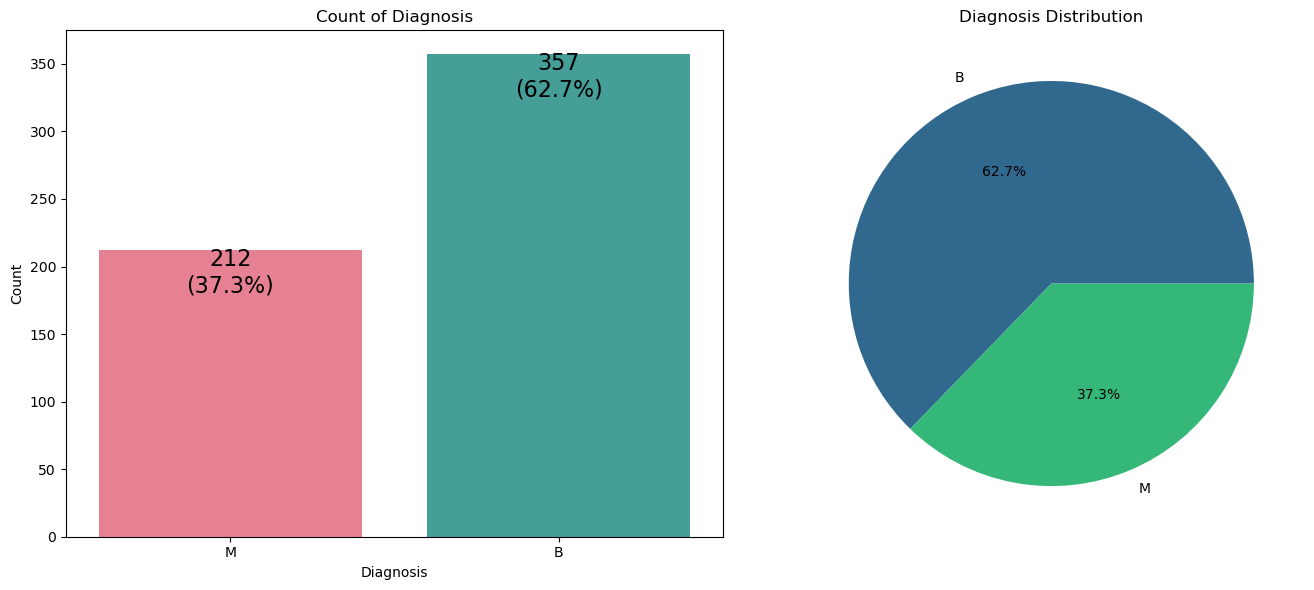

In [10]:
#繪製 diagnosis 類別比例的直方圖和圓餅圖

fig, ax = plt.subplots(1, 2, figsize = (14,6))

#繪製左側直方圖
sns.countplot(data=df,
             x='diagnosis',
             palette= 'husl', 
             ax=ax[0],)
ax[0].set_title('Count of Diagnosis')
ax[0].set_xlabel('Diagnosis')

# 設定自定義的 X 軸標籤名稱
# ax[0].set_xticklabels(['B(惡性)', 'M(良性)'], fontsize=12)
ax[0].set_ylabel('Count')

# 添加比例標籤
total = len(df)
for p in ax[0].patches:
    count = p.get_height()  # 每個條形的高度（計數值）
    percentage = f'{count / total:.1%}'  # 計算比例
    ax[0].text(p.get_x() + p.get_width() / 2,  # X 位置
               count + 2,  # Y 位置（稍高於條形高度）
               f'{count}\n({percentage})',  # 顯示個數和比例 #percentage,  # 顯示比例
               ha='center', va='top', fontsize=16, color='black')

#繪製右側圓餅圖
ax[1].pie(value_counts,
          labels=value_counts.index, 
          autopct='%1.1f%%', 
#            colors=sns.color_palette('husl', len(value_counts)))
           colors=sns.color_palette('viridis', len(value_counts)))
          
ax[1].set_title('Diagnosis Distribution')

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

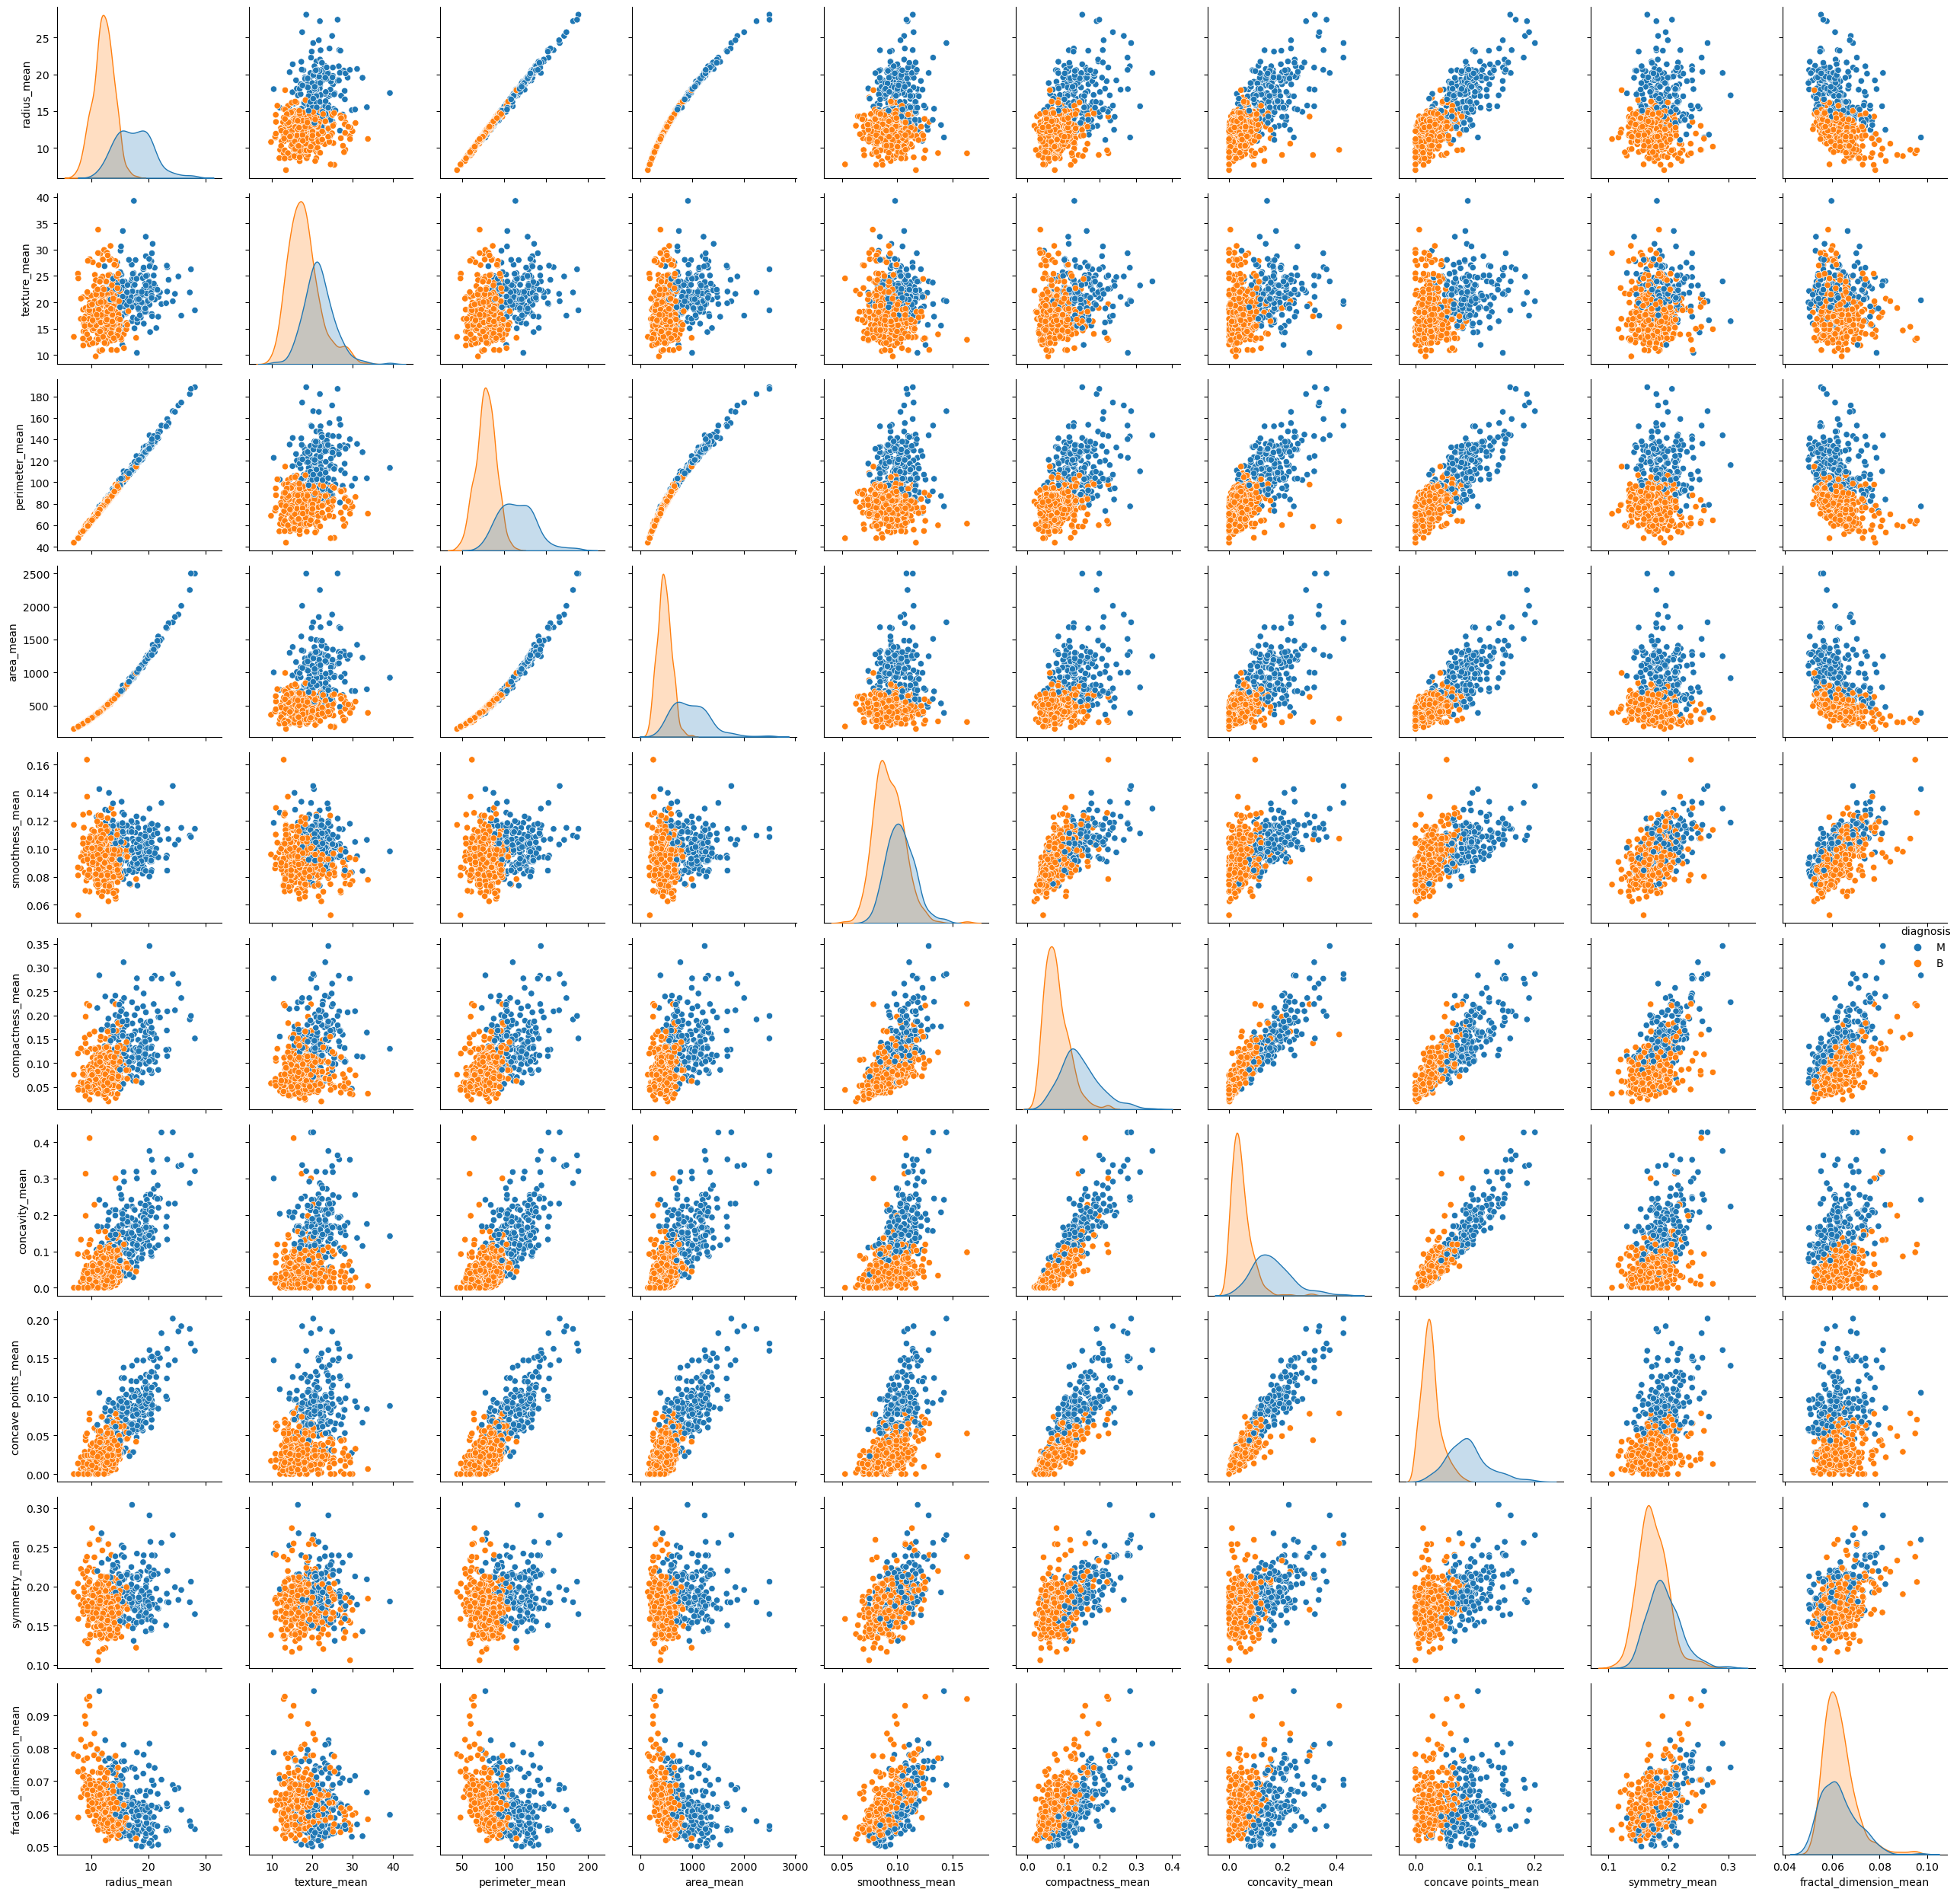

In [11]:
#各類別在特徵(mean)的分佈圖

features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
            'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 
            'fractal_dimension_mean']
sns.pairplot(df[features + ['diagnosis']], hue='diagnosis')
plt.tight_layout()
plt.savefig('scatter_plot.png', dpi = 300)
plt.show()
end_time = time.time()

#sns.pairplot(df[features + ['diagnosis']], hue='diagnosis', palette={'B': 'green', 'M': 'red'})

In [ ]:
#各特徵的分布圖

#刪除 diagnosis
X = df.drop('diagnosis', axis = 1)

def plot_distributions(X, n_cols=5, n_rows=6, figsize=(18, 20)):
    n_plots = n_cols * n_rows
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, (column, ax) in enumerate(zip(X.columns, axes)):
        if i < n_plots:
            sns.histplot(X[column], kde=True, ax=ax)
            ax.set_xlabel(column)
            ax.set_ylabel('')
        else:
            fig.delaxes(ax)

    plt.tight_layout()
    plt.savefig('plot_distributions.png', dpi = 300)
    plt.show()

plot_distributions(X)

In [ ]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

# Correlation Matrix
corr = df_numeric.corr()

plt.figure(figsize=(20,16))
sns.set(style='white')

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr,
           mask=mask,
           cmap=cmap,
           vmax=1,
           vmin=-1,
           center=0,
           square=True,
           linewidths=.5,
           cbar_kws={'shrink': .5},
           annot=True,
           fmt='.2f')

plt.title('Correlation Matrix Heatmap', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix_heatmap.png', dpi=300)
plt.show()

# 前處理

In [19]:
#刪除異常值
def mod_outliers(df, factor=1.5):
    
    # Select the numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # Calculate the IQR
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper limits
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    # Limit outliers
    df_clipped = df.copy()
    for col in numeric_cols:
        df_clipped[col] = df_clipped[col].clip(lower_bound[col], upper_bound[col])
    
    print(f"Outliers {factor} * was delimited using the IQR factor")
    print(f"Number of columns processed: {len(numeric_cols)}")
    
    return df_clipped

# Use Function
df_cleaned = mod_outliers(df)

# 無異常值！！

Outliers 1.5 * was delimited using the IQR factor
Number of columns processed: 30


In [20]:
#計算資料筆數與欄位數
df_cleaned.shape

(569, 31)

In [21]:
# 將目標變數 'diagnosis' 編碼成數值型
df_cleaned['diagnosis'] = df_cleaned['diagnosis'].map({'M': 1, 'B': 0})

# 確認轉換結果
print(df_cleaned['diagnosis'].value_counts())

0    357
1    212
Name: diagnosis, dtype: int64


In [22]:
#顯示資料集前五筆
df_cleaned.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,...,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,1,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,1,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,...,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,1,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


# (額外)只跑有重要性的十個特徵的資料集

In [23]:
# 指定要保留的特征列表
selected_features = ['area_worst', 'concave points_worst', 'texture_worst', 'texture_mean', 'concavity_mean', 'perimeter_se', 'concavity_worst', 
                     'compactness_worst', 'compactness_se', 'area_se']

# 創建新数据集，只保留指定特征
df_selected = df_cleaned[selected_features + ['diagnosis']]

####切訓練集、測試集#####################################
train_set, test_set = train_test_split(df_selected, test_size=0.2, random_state=42)


In [24]:
#顯示資料集前五筆
df_selected.head()

,area_worst,concave points_worst,texture_worst,texture_mean,concavity_mean,perimeter_se,concavity_worst,compactness_worst,compactness_se,area_se,diagnosis
0,1937.05,0.2654,17.33,10.38,0.28241,5.9835,0.7119,0.62695,0.049040,86.20,1
1,1937.05,0.1860,23.41,17.77,0.08690,3.3980,0.2416,0.18660,0.013080,74.08,1
2,1709.00,0.2430,25.53,21.25,0.19740,4.5850,0.4504,0.42450,0.040060,86.20,1
3,567.70,0.2575,26.50,20.38,0.24140,3.4450,0.6869,0.62695,0.061505,27.23,1
4,1575.00,0.1625,16.67,14.34,0.19800,5.4380,0.4000,0.20500,0.024610,86.20,1


# 測試集、訓練集切分

# 原資料集

In [ ]:
# 測試集20%，其餘80%為訓練集
# random state 確保每次切分結果都一樣

train_set, test_set = train_test_split(df_cleaned, test_size=0.2, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# 確認 diagnosis無缺失值
train_set = train_set.dropna(subset=['diagnosis'])
test_set = test_set.dropna(subset=['diagnosis'])

# 計算訓練集 train_set 中 'diagnosis' 列的分布
train_set_count = train_set['diagnosis'].value_counts()
# 計算測試集 test_set 中 'diagnosis' 列的分布
test_set_count = test_set['diagnosis'].value_counts()

print("Train set：")
print(train_set.shape)
print("\nTrain set：")
print(test_set.shape)

# 訓練集和測試集中的目标变量 diagnosis分布
print("\nTrain set diagnosis distribution:")
print(train_set_count)

print("\nTest set diagnosis distribution:")
print(test_set_count)

Train set：
(455, 11)

Train set：
(114, 11)

Train set diagnosis distribution:
0    286
1    169
Name: diagnosis, dtype: int64

Test set diagnosis distribution:
0    71
1    43
Name: diagnosis, dtype: int64


In [26]:
#訓練集類別平衡

# 特徵與目標變量分離
X_train = train_set.drop('diagnosis', axis=1)
y_train = train_set['diagnosis']
X_test = test_set.drop('diagnosis', axis=1)
y_test = test_set['diagnosis']

# 使用 SMOTE 平衡訓練集
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# 查看平衡後的訓練集分布
train_set_count_balanced = pd.Series(y_train_balanced).value_counts()
print("\nBalanced train set diagnosis distribution using SMOTE:")
print(train_set_count_balanced)


Balanced train set diagnosis distribution using SMOTE:
0    286
1    286
Name: diagnosis, dtype: int64


In [27]:
# 正規化

#將數據做正規化，介於0-1之間
#避免特徵之間的數值範圍差異過大，影響模型性能（例如距離或梯度下降算法的收斂速度）

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_balanced)

# 测试集正则化（使用训练集的均值和标准差）
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(X_train_scaled)
print(X_test_scaled)
# value_counts = X_train['diagnosis'].value_counts()
# print(value_counts)

(572, 10)
(114, 10)
[[-1.2490488   0.71480661 -0.59803049 ...  1.14955732  2.43351282
  -0.84303343]
 [ 1.99718636  2.45040501  1.27691681 ...  2.47115288  1.48460574
   1.62133398]
 [-1.2784438  -1.15370882 -1.1901191  ... -0.71504087  0.92474033
  -0.61703328]
 ...
 [ 1.0122193   1.12479041  1.55141156 ...  0.5843404  -0.26348423
   0.25732928]
 [ 1.25045178  0.55172476 -1.14885792 ... -0.40003422 -0.16594414
   1.80445205]
 [ 1.61729733  1.13848779  0.39227141 ...  0.83893475  0.84059647
   1.80445205]]
[[-0.53793132 -0.39158092 -0.25351108 ... -0.22928771 -0.45753395
  -0.35549123]
 [ 1.85413739  0.77351289  0.08235205 ... -0.2584329  -0.63415409
   1.80445205]
 [ 0.42465436  0.35955837 -0.01806064 ... -0.21818478 -0.74871851
   0.34066648]
 ...
 [-0.91261695 -0.47316759 -0.85079346 ... -0.78165845 -0.92329287
  -0.80633255]
 [-0.36458134 -0.68225226  2.49918162 ... -0.19597893  0.17938967
  -0.36823996]
 [ 1.99718636  0.5778253   2.86966982 ... -0.04470151 -0.7528101
   1.80445205

# Decision tree

In [28]:
dtx = DecisionTreeClassifier()
parameters = {
    'criterion': ['entropy'],
    'max_depth': 7,
    'min_samples_leaf': 2,
    'min_samples_split': 5,
    'splitter': ['random'],
}

In [29]:
#----參數----#
# criterion 確定決策樹將使用哪個 criteria 來拆分分支。'gini'：使用 Gini 雜質計算分割。它測量節點中實例的純度，並嘗試創建更純凈的（單類）節點。
#'entropy'：使用 entropy 評估分區。它使用資訊增益度量進行拆分，並嘗試最大化資訊增益。

# max_depth 確定樹的最大深度。更高的深度意味著模型更複雜，對數據集的適應性更強，但過擬合的風險會增加。
#較低的深度使模型更簡單且更具泛化性。

# min_samples_leaf 設置葉節點中必須存在的最小樣本數。這是停止分支所需的最小樣本數。
#值越高，創建的葉節點越大，模型的複雜性就越低

# min_samples_split 指定內部節點進一步拆分所需的最小樣本數。值越高，意味著拆分越少，樹的複雜度就越低。
#這有助於防止模型過度學習（過度擬合）。

# splitter 確定節點的拆分方式。'best'：選擇最佳分割。在每個節點上，它根據可用標準進行最佳拆分。
#'random'：選擇隨機拆分。在每個節點上，它會評估一定數量的隨機拆分選項並選擇最佳選項。這可以增加模型的多樣性並減少過度學習。

# AdaBoost

In [30]:
# AdaBoost
ada = AdaBoostClassifier(base_estimator = dtx)
ada = AdaBoostClassifier(dtx, n_estimators=50, random_state = 42)
ada.fit(X_train_scaled, y_train_balanced)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [31]:
y_pred_ada = ada.predict(X_test_scaled)

In [32]:
# 評估指標
accuracy = accuracy_score(y_test, y_pred_ada)
precision = precision_score(y_test, y_pred_ada, average='weighted')
recall = recall_score(y_test, y_pred_ada, average='weighted')
f1 = f1_score(y_test, y_pred_ada, average='weighted')

# print('ADABoost Accuracy Score on X_train =', accuracy_score(y_train, ada.predict(X_train)))
# print('ADABoost Accuracy Score on X_test =', accuracy_score(y_test, ada.predict(X_test)))

print(f'ADABoost Accuracy: {accuracy:.2f}')
print(f'ADABoost Precision: {precision:.2f}')
print(f'ADABoost Recall: {recall:.2f}')
print(f'ADABoost F1-Score: {f1:.2f}')

ADABoost Accuracy: 0.90
ADABoost Precision: 0.90
ADABoost Recall: 0.90
ADABoost F1-Score: 0.90


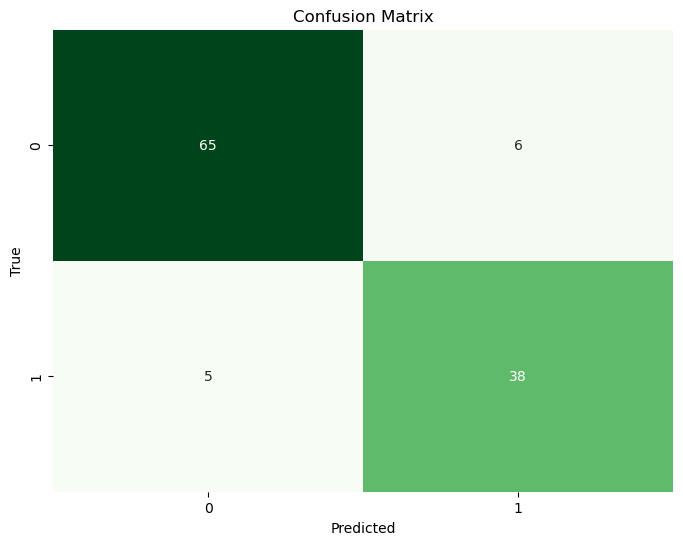

In [33]:
#混淆矩陣
cm_ada = confusion_matrix(y_test, y_pred_ada)

plt.figure(figsize=(8,6))
sns.heatmap(cm_ada, annot=True, cmap='Greens', fmt='g', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

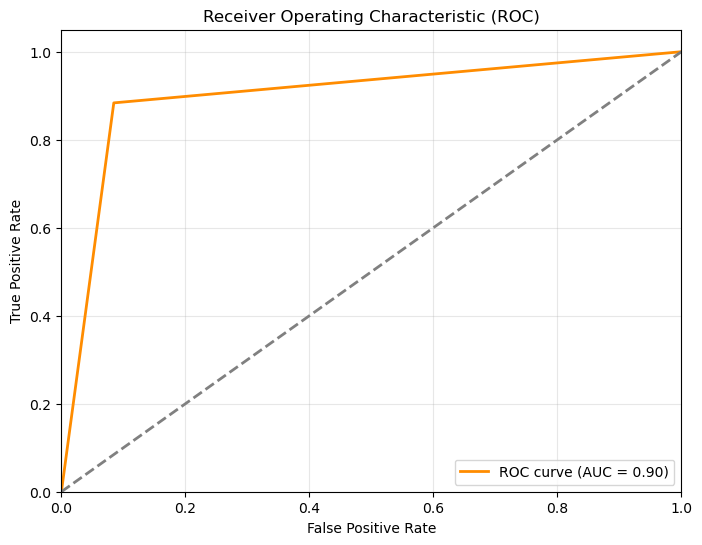

In [34]:
# 繪製 ROC 曲線
y_pred_prob_ada = ada.predict_proba(X_test_scaled)[:, 1]  # 獲取正類別的預測機率

# 計算 FPR 和 TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_ada)
roc_auc = auc(fpr, tpr)

# 繪製 ROC 曲線
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # 基準線
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)  # 增加網格方便觀察
plt.show()


In [36]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        71
           1       0.86      0.88      0.87        43

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



# 五折交叉驗證

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# 假設 df 是你的原始資料集，目標變數是 'diagnosis'
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 初始化 KFold 進行五折交叉驗證
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 記錄每一折的評估指標
accuracies = []
precisions = []
recalls = []
f1_scores = []

# 五折交叉驗證
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    # 分割訓練集與測試集
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 對訓練集進行正規化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # 對測試集也使用相同的標準化參數
    X_test_scaled = scaler.transform(X_test)
    
    # 訓練模型
    ada.fit(X_train_scaled, y_train)
    
    # 測試模型並計算評估指標
    y_pred = ada.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, pos_label='M'))  # 假設 'M' 是正類
    recalls.append(recall_score(y_test, y_pred, pos_label='M'))
    f1_scores.append(f1_score(y_test, y_pred, pos_label='M'))
    
    # 輸出當前折的指標
    print(f"Fold {fold} Accuracy: {accuracies[-1]:.2f}")
    print(f"Fold {fold} Precision: {precisions[-1]:.2f}")
    print(f"Fold {fold} Recall: {recalls[-1]:.2f}")
    print(f"Fold {fold} F1-Score: {f1_scores[-1]:.2f}\n")

# 計算五折交叉驗證的平均值
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1 = sum(f1_scores) / len(f1_scores)

# 輸出平均值
print(f"\nAverage Accuracy across 5-folds: {mean_accuracy:.2f}")
print(f"Average Precision across 5-folds: {mean_precision:.2f}")
print(f"Average Recall across 5-folds: {mean_recall:.2f}")
print(f"Average F1-Score across 5-folds: {mean_f1:.2f}")


# 特徵重要性

In [ ]:
# 特徵重要性
feature_importances = ada.feature_importances_
feature_names = X_train.columns

# 創建 DataFrame 排序並視覺化
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances from AdaBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# 印出特徵重要性表格
print("\nFeature Importances:")
print(importance_df)